# Name: Hania Rasheed
# Registration No: B23S0983DS009
# Program: BS DS - 23 (S)
# Date: 18 April, 2025

---


Importing the neccessary libraries.

In [ ]:
 import cv2
 import numpy as np
 import matplotlib.pyplot as plt
 from sklearn.cluster import KMeans
 from skimage.filters import threshold_li
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.model_selection import train_test_split

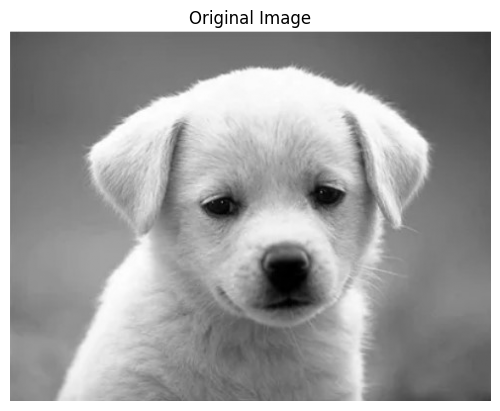

In [ ]:
 image = cv2.imread('dog_image.jpg', cv2.IMREAD_GRAYSCALE)
 plt.imshow(image, cmap='gray')
 plt.title('Original Image')
 plt.axis('off')
 plt.show()

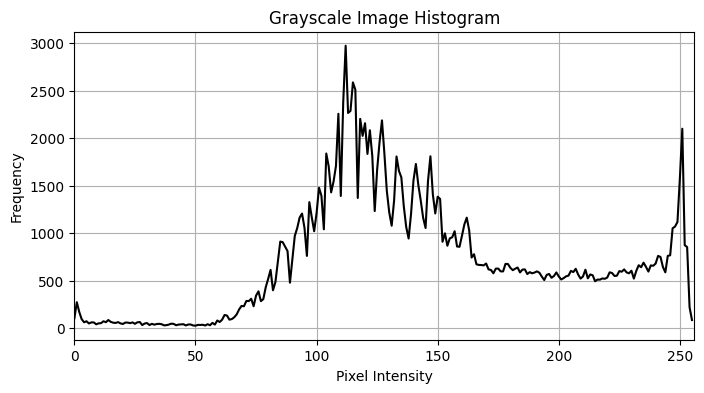

In [ ]:
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Plot
plt.figure(figsize=(8, 4))
plt.title("Grayscale Image Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.plot(hist, color='black')
plt.xlim([0, 256])
plt.grid()
plt.show()

Tasks:
1. Implement Otsu’s Thresholding:
- Apply Otsu’s method to segment an image based on its histogram.
- Compare the results with other thresholding techniques.


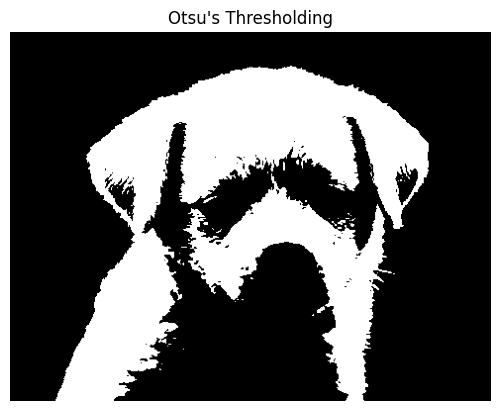

In [ ]:
 _, otsu = cv2.threshold(image, 150, 250, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
 plt.imshow(otsu, cmap='gray')
 plt.title("Otsu's Thresholding")
 plt.axis('off')
 plt.show()

2. Apply K-Means Clustering for Thresholding:
- Use K-means clustering to segment the image into foreground and background.
- Choose an optimal number of clusters and analyze the segmentation results.

### Number of Clusters chosen is 5
Too few clusters (low K):
✅ Simpler output,
❌ Misses subtle details or merges different objects.

Too many clusters (high K):
✅ Captures more detail,
❌ Over-segmentation — might split one object into parts.

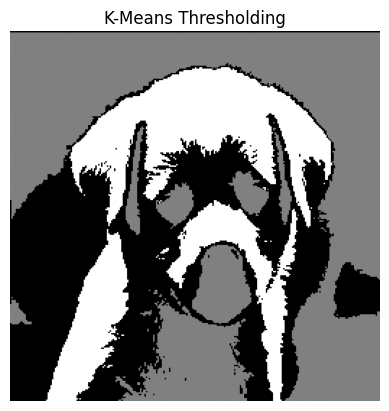

In [ ]:
 img = cv2.resize(image, (256, 256))
 pixels = img.reshape((-1, 1))
 kmeans = KMeans(n_clusters=3, n_init=5).fit(pixels)
 thresholded = kmeans.labels_.reshape(img.shape)
 plt.imshow(thresholded, cmap='gray')
 plt.title('K-Means Thresholding')
 plt.axis('off')
 plt.show()

3. Entropy-Based Thresholding:
- Implement Li’s method to minimize cross-entropy between the original and segmented image.
- Evaluate the effectiveness of entropy-based segmentation on noisy or complex images.

Entropy-based segmentation is effective for noisy or complex images as it captures subtle intensity variations and texture details, but may struggle with uniform or low-contrast regions.

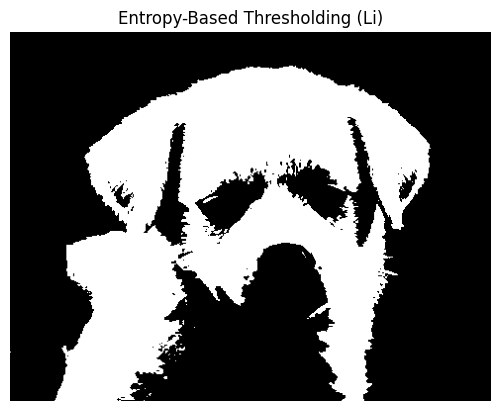

In [ ]:
 li_thresh = threshold_li(image)
 entropy_result = image > li_thresh
 plt.imshow(entropy_result, cmap='gray')
 plt.title('Entropy-Based Thresholding (Li)')
 plt.axis('off')
 plt.show()

4. Fuzzy Thresholding:
- Apply fuzzy logic-based thresholding using fuzzy clustering (Fuzzy C-Means).
- Handle images with blurry or unclear boundaries between objects and background.


In [ ]:
 pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.7 MB/s eta 0:00:00


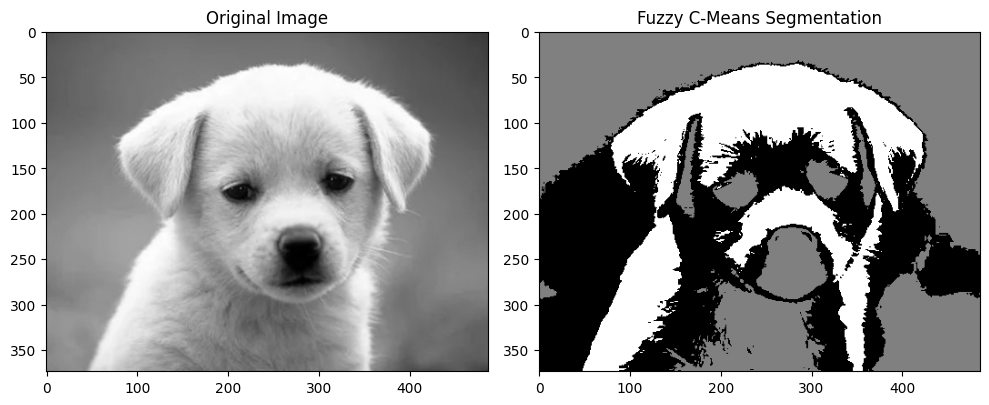

In [ ]:
import skfuzzy as fuzz
pixel_values = image.flatten().astype(np.float64)
# Fuzzy C-Means Clustering
n_clusters = 3  # foreground and background
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
data=pixel_values[np.newaxis, :], c=n_clusters, m=6, error=0.005, maxiter=1000, init=None)
 # Get cluster memberships
cluster_membership = np.argmax(u, axis=0)
# Reshape to original image shape
segmented_image = cluster_membership.reshape(image.shape)
 # Plot results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Fuzzy C-Means Segmentation")
plt.imshow(segmented_image, cmap='gray')
plt.tight_layout()
plt.show()


5. Deep Learning-Based Thresholding:
-  Simulate CNN output for binary segmentation.
-  Apply a threshold to classify pixels as foreground or background.
-  Experiment with threshold adjustments to fine-tune the segmentation results.

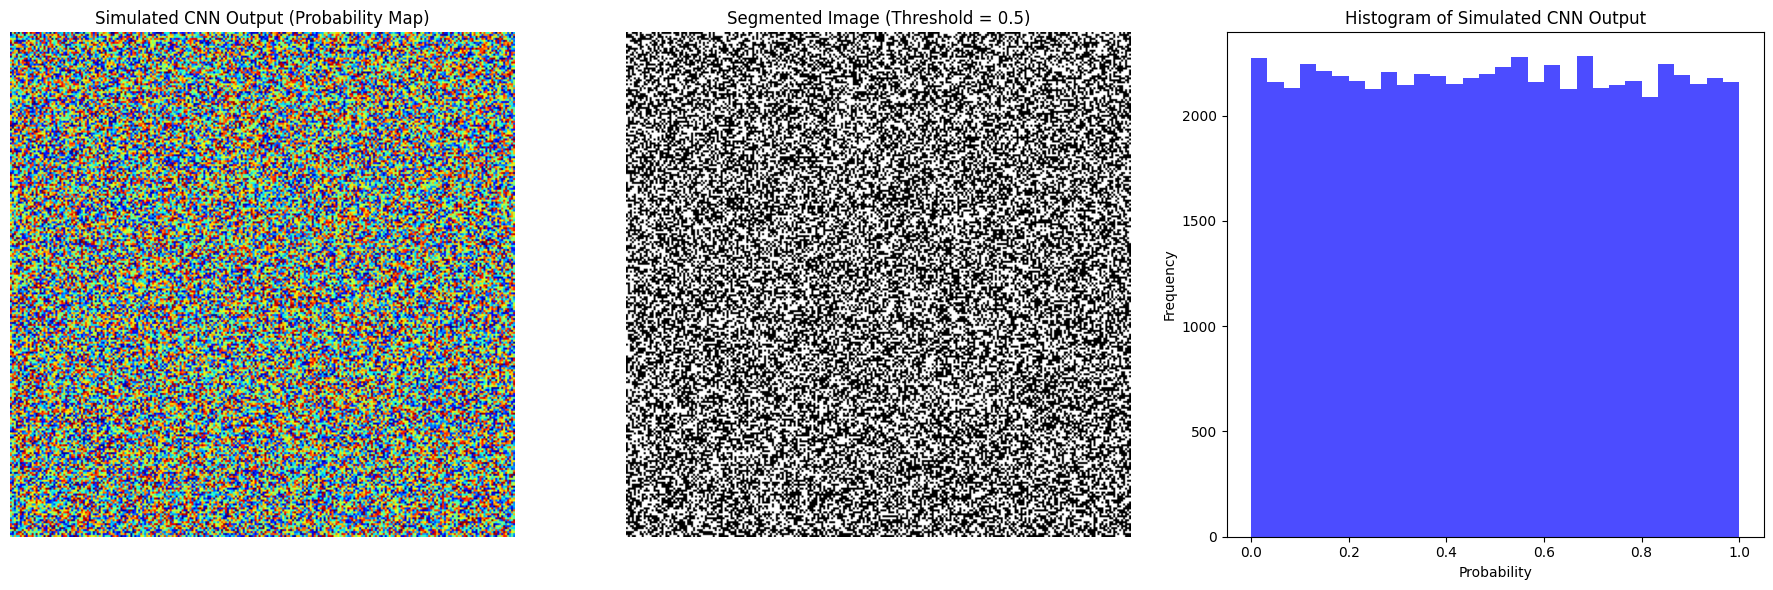

In [ ]:
def simulate_cnn_output(image_shape):
    return np.random.rand(*image_shape)  # Generates random values between 0 and 1

def apply_threshold(prob_map, threshold=0.5):
    return (prob_map > threshold).astype(int)

# Example image shape (height, width)
image_shape = (256, 256)



# Simulate CNN output
probability_map = simulate_cnn_output(image_shape)

# Apply threshold to classify pixels
threshold_value = 0.5
segmented_image1 = apply_threshold(probability_map, threshold_value)


fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(probability_map, cmap='jet')
axes[0].set_title('Simulated CNN Output (Probability Map)')
axes[0].axis('off')
axes[1].imshow(segmented_image1, cmap='gray')
axes[1].set_title(f'Segmented Image (Threshold = {threshold_value})')
axes[1].axis('off')
axes[2].hist(probability_map.ravel(), bins=30, color='blue', alpha=0.7)
axes[2].set_title('Histogram of Simulated CNN Output')
axes[2].set_xlabel('Probability')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

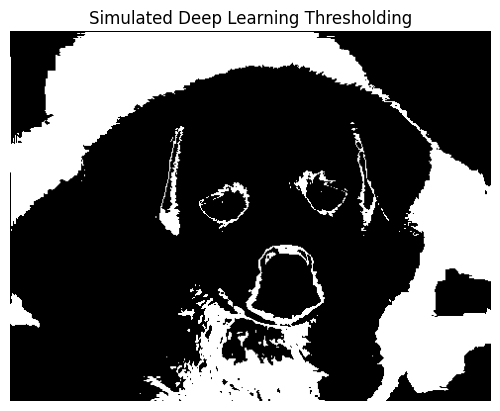

In [ ]:
 simulated_output = 1 / (1 + np.exp(-(image - 130) / 10))
 binary_output = simulated_output > 0.06
 plt.imshow(binary_output, cmap='gray')
 plt.title('Simulated Deep Learning Thresholding')
 plt.axis('off')
 plt.show()

With lower threshold values we have higher sensitivities and edges are clearly identified

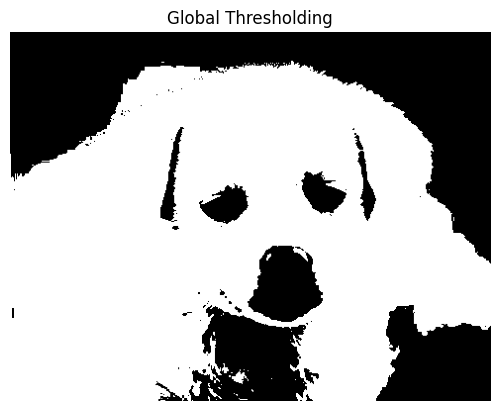

In [ ]:
 _, th1 = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)
 plt.imshow(th1, cmap='gray')
 plt.title('Global Thresholding')
 plt.axis('off')
 plt.show()

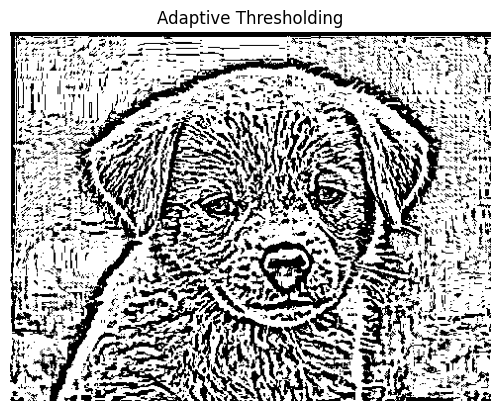

In [ ]:
 adaptive = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
 cv2.THRESH_BINARY, 9, 1)
 plt.imshow(adaptive, cmap='gray')
 plt.title('Adaptive Thresholding')
 plt.axis('off')
 plt.show()

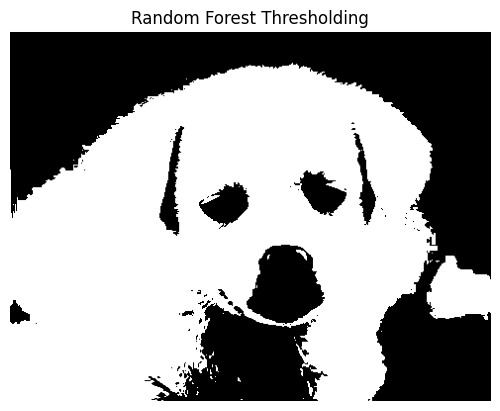

In [ ]:
 X = []
 Y = []
 for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    X.append([i, j, image[i, j]])
    Y.append(1 if image[i, j] > 127 else 0)
 X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
 clf = RandomForestClassifier(n_estimators=10).fit(X_train, Y_train)
 Y_pred = clf.predict(X)
 result_img = np.array(Y_pred).reshape(image.shape)
 plt.imshow(result_img, cmap='gray')
 plt.title('Random Forest Thresholding')
 plt.axis('off')
 plt.show()

6. Compare and Evaluate Results:
- Compare the segmented images from different thresholding methods.
- Analyze the strengths and weaknesses of each method for various image types.

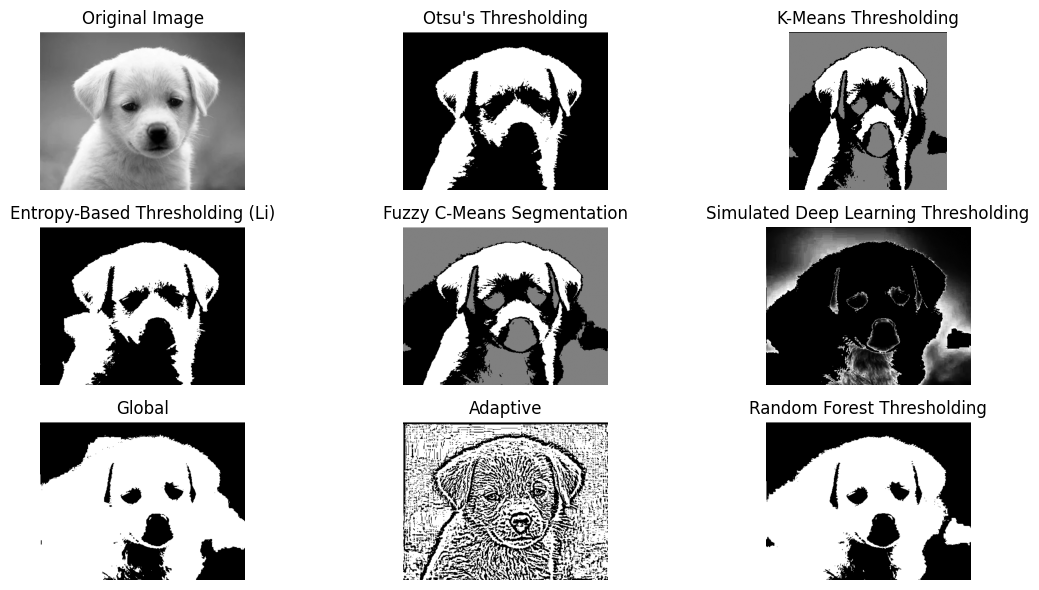

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(3, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# First row
plt.subplot(3, 3, 2)
plt.title("Otsu's Thresholding")
plt.imshow(otsu, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.title('K-Means Thresholding')
plt.imshow(thresholded, cmap='gray')
plt.axis('off')

# Second row
plt.subplot(3, 3, 4)
plt.title('Entropy-Based Thresholding (Li)')
plt.imshow(entropy_result, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.title("Fuzzy C-Means Segmentation")
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.title('Simulated Deep Learning Thresholding')
plt.imshow(simulated_output, cmap='gray')
plt.axis('off')

# third row
plt.subplot(3, 3, 7)
plt.title('Global')
plt.imshow(th1, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.title("Adaptive")
plt.imshow(adaptive, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 9)
plt.title('Random Forest Thresholding')
plt.imshow(result_img, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()


---






##  **Comparison of Thresholding and Segmentation Techniques**

### **1. Otsu Thresholding**
- **Method Type:** Global thresholding
- **Strengths:**
  - Automatically chooses the threshold based on **inter-class variance**.
  - Simple, fast, and requires **no manual input**.
- **Weaknesses:**
  - Assumes a **bimodal histogram** — poor performance if the image histogram isn't clearly split.
  - Sensitive to **noise** and **non-uniform illumination**.
- **Best For:**
  - Simple images with **clear background and foreground intensity peaks**.
  - E.g., scanned documents, binary blobs on plain backgrounds.

---

### **2. K-Means Thresholding**
- **Method Type:** Unsupervised clustering
- **Strengths:**
  - Segments image into **k clusters** based on pixel intensity or color.
  - Works with **multi-modal histograms**.
- **Weaknesses:**
  - Requires setting **k (number of clusters)**.
  - Sensitive to **initial centroid selection**.
- **Best For:**
  - Images with **multiple objects or classes**.
  - E.g., natural scenes with 2–4 object types.

---

### **3. Entropy-Based Thresholding (Li's Method)**
- **Method Type:** Information-theoretic
- **Strengths:**
  - Maximizes entropy between foreground and background.
  - Handles **complex textures and subtle intensity differences**.
- **Weaknesses:**
  - Can struggle with **uniform or flat regions**.
  - **Slower** than Otsu or K-means.
- **Best For:**
  - **Medical images**, **microscopy**, or **remote sensing**.
  - Textured or low-contrast regions.

---

### **4. Fuzzy C-Means (FCM) Segmentation**
- **Method Type:** Soft clustering
- **Strengths:**
  - Allows pixels to belong to **multiple clusters**.
  - Good for **blurry or uncertain boundaries**.
- **Weaknesses:**
  - **Computationally expensive**.
  - May require **post-processing** to reduce noise.
- **Best For:**
  - Gradual transitions and **soft-edged features**.
  - E.g., medical MRI scans, weather or fog-based imagery.

---

### **5. Simulated Deep Learning Segmentation**
- **Method Type:** Data-driven, often CNN-based
- **Strengths:**
  - Learns complex patterns and **context-aware** features.
  - Handles **noise, occlusion, shadows**, etc.
- **Weaknesses:**
  - Requires **training data** and high **compute resources**.
  - Generalization can be an issue without proper training.
- **Best For:**
  - Complex real-world applications, like **autonomous vehicles**, **cancer detection**, etc.

---

## 📊 Summary Table

| Technique                     | Ideal Image Type                  | Handles Noise | Boundary Accuracy | Speed     | Complexity |
|------------------------------|-----------------------------------|---------------|-------------------|-----------|------------|
| **Otsu Thresholding**        | Bimodal, simple contrast          | ❌ Low        | ❌ Hard            | ✅ Fast    | ✅ Low      |
| **K-Means Thresholding**     | Multi-modal, distinct objects     | ⚠️ Moderate   | ⚠️ Decent          | ✅ Fast    | ⚠️ Moderate |
| **Entropy-Based (Li)**       | Textured/low-contrast             | ✅ High       | ✅ Soft            | ⚠️ Medium | ⚠️ Medium   |
| **Fuzzy C-Means (FCM)**      | Soft boundaries, noisy images     | ⚠️ Moderate   | ✅ Soft            | ❌ Slow   | ❌ High     |
| **Deep Learning (Simulated)**| Complex, real-world data          | ✅ High       | ✅ Very Accurate   | ❌ Slow   | ❌ High     |

---




- Provide insights on when to use each thresholding technique based on image characteristics.
## Recommendations

- **Otsu**: Use for **binary segmentation** where contrast is clear.
- **K-Means**: Use for **multi-object images** with decent separation.
- **Entropy (Li)**: Great for **detailed textures** and **low-contrast** images.
- **FCM**: Use when objects have **blurry edges** or **gradual transitions**.
- **Deep Learning**: Best for **high-accuracy needs** with **available training data**.

---
